In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


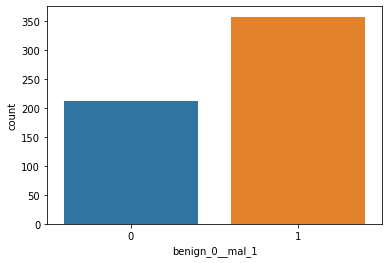

In [6]:
sns.countplot(x = 'benign_0__mal_1',data=df)

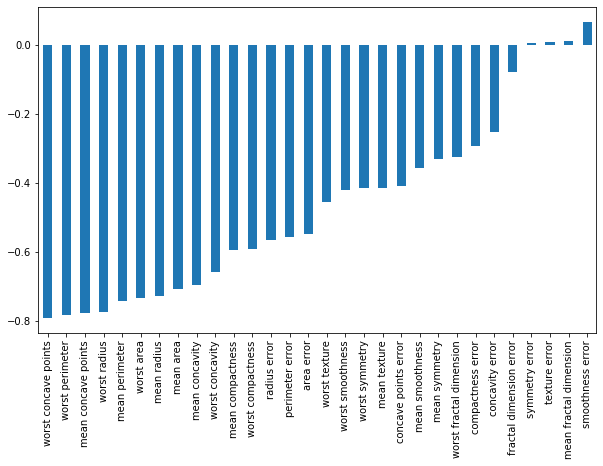

In [7]:
plt.figure(figsize=(10,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

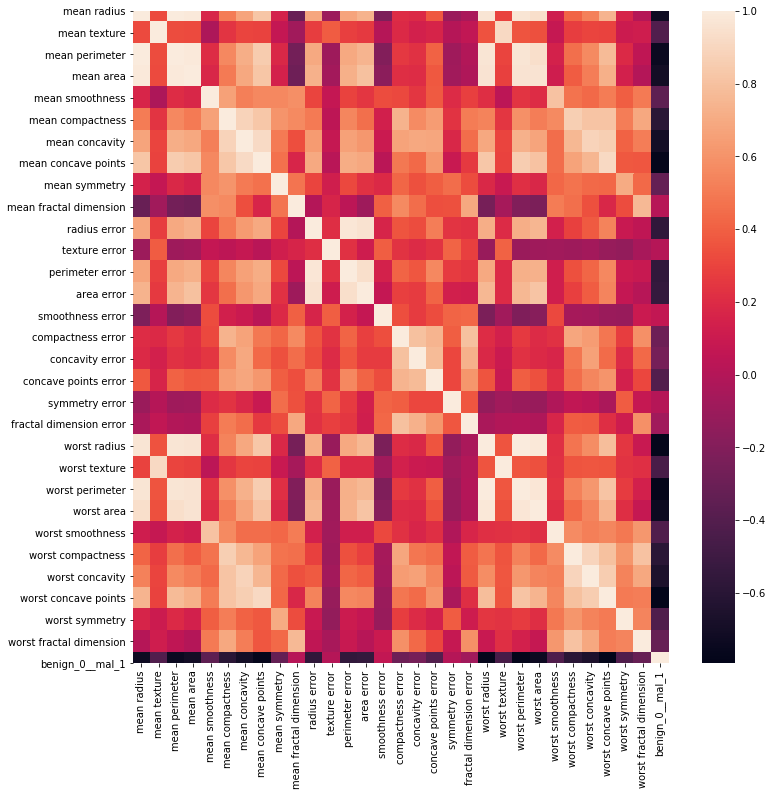

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [9]:
X = df.drop(['benign_0__mal_1'],axis=1).values
y = df['benign_0__mal_1'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [16]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=[X_test,y_test])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 5ms/sample - loss: 0.6826 - val_loss: 0.6583
Epoch 2/600
426/426 [==============================] - 0s 148us/sample - loss: 0.6406 - val_loss: 0.6214
Epoch 3/600
426/426 [==============================] - 0s 105us/sample - loss: 0.6006 - val_loss: 0.5791
Epoch 4/600
426/426 [==============================] - 0s 106us/sample - loss: 0.5546 - val_loss: 0.5259
Epoch 5/600
426/426 [==============================] - 0s 110us/sample - loss: 0.5029 - val_loss: 0.4747
Epoch 6/600
426/426 [==============================] - 0s 115us/sample - loss: 0.4547 - val_loss: 0.4235
Epoch 7/600
426/426 [==============================] - 0s 117us/sample - loss: 0.4062 - val_loss: 0.3748
Epoch 8/600
426/426 [==============================] - 0s 108us/sample - loss: 0.3633 - val_loss: 0.3331
Epoch 9/600
426/426 [==============================] - 0s 108us/sample - loss: 0.3316 - val_loss: 0.3024
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0553 - val_loss: 0.1220
Epoch 79/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0560 - val_loss: 0.1087
Epoch 80/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0566 - val_loss: 0.1126
Epoch 81/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0568 - val_loss: 0.1130
Epoch 82/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0545 - val_loss: 0.1113
Epoch 83/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0553 - val_loss: 0.1123
Epoch 84/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0532 - val_loss: 0.1173
Epoch 85/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0537 - val_loss: 0.1103
Epoch 86/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0530 - val_loss: 0.1150
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0435 - val_loss: 0.1259
Epoch 156/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0416 - val_loss: 0.1269
Epoch 157/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0428 - val_loss: 0.1258
Epoch 158/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0462 - val_loss: 0.1484
Epoch 159/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0476 - val_loss: 0.1266
Epoch 160/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0427 - val_loss: 0.1268
Epoch 161/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0457 - val_loss: 0.1337
Epoch 162/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0434 - val_loss: 0.1299
Epoch 163/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0493 - val_loss: 0.1334
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 115us/sample - loss: 0.0371 - val_loss: 0.1407
Epoch 232/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0351 - val_loss: 0.1402
Epoch 233/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0344 - val_loss: 0.1443
Epoch 234/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0358 - val_loss: 0.1578
Epoch 235/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0339 - val_loss: 0.1393
Epoch 236/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0363 - val_loss: 0.1384
Epoch 237/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0353 - val_loss: 0.1493
Epoch 238/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0332 - val_loss: 0.1411
Epoch 239/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0385 - val_loss: 0.1592
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 110us/sample - loss: 0.0291 - val_loss: 0.1666
Epoch 308/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0292 - val_loss: 0.1530
Epoch 309/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0268 - val_loss: 0.1618
Epoch 310/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0272 - val_loss: 0.1585
Epoch 311/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0278 - val_loss: 0.1565
Epoch 312/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0300 - val_loss: 0.1728
Epoch 313/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0294 - val_loss: 0.1561
Epoch 314/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0359 - val_loss: 0.1766
Epoch 315/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0377 - val_loss: 0.1494
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 113us/sample - loss: 0.0316 - val_loss: 0.1829
Epoch 384/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0229 - val_loss: 0.1743
Epoch 385/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0231 - val_loss: 0.1850
Epoch 386/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0209 - val_loss: 0.1890
Epoch 387/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0232 - val_loss: 0.1815
Epoch 388/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0219 - val_loss: 0.1941
Epoch 389/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0210 - val_loss: 0.1836
Epoch 390/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0214 - val_loss: 0.1960
Epoch 391/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0205 - val_loss: 0.1846
Epoch 392/600
426/426 [============================

426/426 [==============================] - 0s 113us/sample - loss: 0.0166 - val_loss: 0.2047
Epoch 460/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0166 - val_loss: 0.2099
Epoch 461/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0152 - val_loss: 0.2215
Epoch 462/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0182 - val_loss: 0.2140
Epoch 463/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0177 - val_loss: 0.2010
Epoch 464/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0173 - val_loss: 0.2242
Epoch 465/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0153 - val_loss: 0.2160
Epoch 466/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0174 - val_loss: 0.2170
Epoch 467/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0228 - val_loss: 0.2107
Epoch 468/600
426/426 [==============================]

Epoch 536/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0112 - val_loss: 0.2523
Epoch 537/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0120 - val_loss: 0.2428
Epoch 538/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0125 - val_loss: 0.2816
Epoch 539/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0137 - val_loss: 0.2534
Epoch 540/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0113 - val_loss: 0.2488
Epoch 541/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0107 - val_loss: 0.2681
Epoch 542/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0118 - val_loss: 0.2550
Epoch 543/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0123 - val_loss: 0.2434
Epoch 544/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0134 - val_loss: 0.2538
Epoch 545/600
426/426 [===============

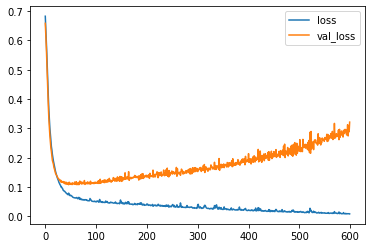

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Early Stopping Mechanism

In [20]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [22]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model.fit(x=X_train,y=y_train,epochs=600,
          validation_data=[X_test,y_test],
          callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6860 - val_loss: 0.6746
Epoch 2/600
426/426 [==============================] - 0s 136us/sample - loss: 0.6554 - val_loss: 0.6395
Epoch 3/600
426/426 [==============================] - 0s 102us/sample - loss: 0.6166 - val_loss: 0.5981
Epoch 4/600
426/426 [==============================] - 0s 103us/sample - loss: 0.5730 - val_loss: 0.5482
Epoch 5/600
426/426 [==============================] - 0s 114us/sample - loss: 0.5208 - val_loss: 0.4942
Epoch 6/600
426/426 [==============================] - 0s 113us/sample - loss: 0.4679 - val_loss: 0.4385
Epoch 7/600
426/426 [==============================] - 0s 124us/sample - loss: 0.4142 - val_loss: 0.3849
Epoch 8/600
426/426 [==============================] - 0s 110us/sample - loss: 0.3692 - val_loss: 0.3371
Epoch 9/600
426/426 [==============================] - 0s 127us/sample - loss: 0.3279 - val_loss: 0.3006
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0496 - val_loss: 0.1111
Epoch 79/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0491 - val_loss: 0.1136
Epoch 80/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0486 - val_loss: 0.1103
Epoch 81/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0508 - val_loss: 0.1148
Epoch 82/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0486 - val_loss: 0.1138
Epoch 83/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0512 - val_loss: 0.1204
Epoch 84/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0485 - val_loss: 0.1119
Epoch 00084: early stopping


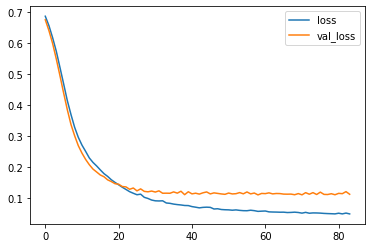

In [24]:
loss_early_stop = pd.DataFrame(model.history.history)
loss_early_stop.plot()

## Drop out Neuron

In [26]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [27]:
model.fit(x=X_train,y=y_train,epochs=600,
          validation_data=[X_test,y_test],
          callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6985 - val_loss: 0.6668
Epoch 2/600
426/426 [==============================] - 0s 143us/sample - loss: 0.6773 - val_loss: 0.6538
Epoch 3/600
426/426 [==============================] - 0s 206us/sample - loss: 0.6648 - val_loss: 0.6372
Epoch 4/600
426/426 [==============================] - 0s 152us/sample - loss: 0.6397 - val_loss: 0.6156
Epoch 5/600
426/426 [==============================] - 0s 136us/sample - loss: 0.6306 - val_loss: 0.5942
Epoch 6/600
426/426 [==============================] - 0s 131us/sample - loss: 0.6064 - val_loss: 0.5715
Epoch 7/600
426/426 [==============================] - 0s 144us/sample - loss: 0.5856 - val_loss: 0.5403
Epoch 8/600
426/426 [==============================] - 0s 129us/sample - loss: 0.5655 - val_loss: 0.5103
Epoch 9/600
426/426 [==============================] - 0s 129us/sample - loss: 0.5448 - val_loss: 0.4783
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1509 - val_loss: 0.1043
Epoch 79/600
426/426 [==============================] - 0s 115us/sample - loss: 0.1201 - val_loss: 0.0950
Epoch 80/600
426/426 [==============================] - 0s 110us/sample - loss: 0.1216 - val_loss: 0.0959
Epoch 81/600
426/426 [==============================] - 0s 110us/sample - loss: 0.1326 - val_loss: 0.0945
Epoch 82/600
426/426 [==============================] - 0s 110us/sample - loss: 0.1145 - val_loss: 0.0984
Epoch 83/600
426/426 [==============================] - 0s 115us/sample - loss: 0.1197 - val_loss: 0.1088
Epoch 84/600
426/426 [==============================] - 0s 115us/sample - loss: 0.1406 - val_loss: 0.0935
Epoch 85/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1267 - val_loss: 0.1046
Epoch 86/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1153 - val_loss: 0.1008
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0979 - val_loss: 0.1005
Epoch 156/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0951 - val_loss: 0.1071
Epoch 157/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0818 - val_loss: 0.0906
Epoch 158/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0948 - val_loss: 0.0848
Epoch 159/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0733 - val_loss: 0.0851
Epoch 160/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0836 - val_loss: 0.0942
Epoch 161/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0816 - val_loss: 0.0948
Epoch 162/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0922 - val_loss: 0.0854
Epoch 163/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0951 - val_loss: 0.0895
Epoch 164/600
426/426 [==============

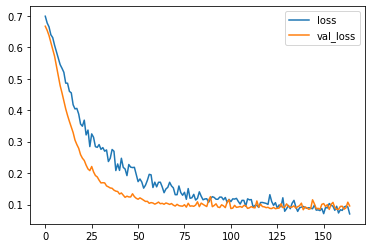

In [28]:
loss_drop_early_stop = pd.DataFrame(model.history.history)
loss_drop_early_stop.plot()

In [33]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [34]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
